<a href="https://colab.research.google.com/github/shunya-yan/colab/blob/main/%E8%AA%AC%E6%98%8E%E5%8F%AF%E8%83%BD%E3%81%AAAI_ipynb_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 環境構築

In [ ]:
!pip install shap
!pip install slicer
import shap
import xgboost

# 2. データセットの確認

In [ ]:
# adultデータセットを取得
X,y = shap.datasets.adult()

# データを確認
print(X)

        Age  Workclass  Education-Num  Marital Status  Occupation  \
0      39.0          7           13.0               4           1   
1      50.0          6           13.0               2           4   
2      38.0          4            9.0               0           6   
3      53.0          4            7.0               2           6   
4      28.0          4           13.0               2          10   
...     ...        ...            ...             ...         ...   
32556  27.0          4           12.0               2          13   
32557  40.0          4            9.0               2           7   
32558  58.0          4            9.0               6           1   
32559  22.0          4            9.0               4           1   
32560  52.0          5            9.0               2           4   

       Relationship  Race  Sex  Capital Gain  Capital Loss  Hours per week  \
0                 0     4    1        2174.0           0.0            40.0   
1              

# 3. SHAP値の計算

In [ ]:
# XGBoostモデルの訓練
model = xgboost.XGBClassifier().fit(X, y)

# SHAP explainerの作成（モデルとデータを渡す）
explainer = shap.Explainer(model, X)

# SHAP値の計算（各特徴量の影響度を算出）
shap_values = explainer(X)

 98%|===================| 32017/32561 [01:00<00:01]       

# 4. 個別の結果の表示

モデルの予測スコア: 1.8968353271484375
モデルの最終予測: 5万ドルを超える


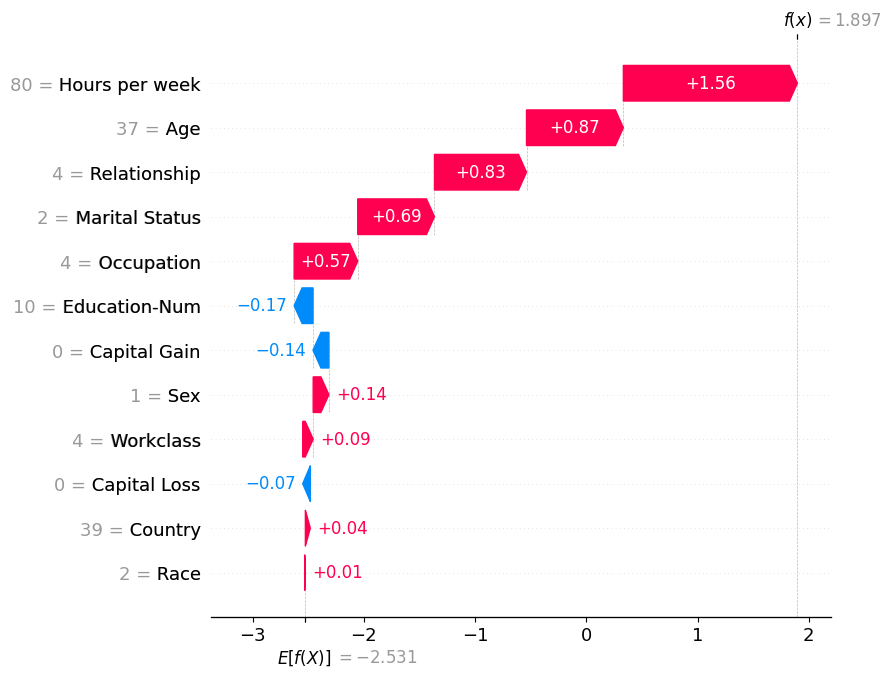

In [ ]:
# 個人ごとのSHAP値と特徴量の関係性を表示
n = 10

logit_scores = model.predict(X, output_margin=True)

print(f"モデルの予測スコア: {logit_scores[n]}")
if logit_scores[n] > 0:
  print(f"モデルの最終予測: 5万ドルを超える")
else:
  print(f"モデルの最終予測: 5万ドルを超えない")
shap.plots.waterfall(shap_values[n], max_display=12, show=True)

# 5. 全体的な結果の表示

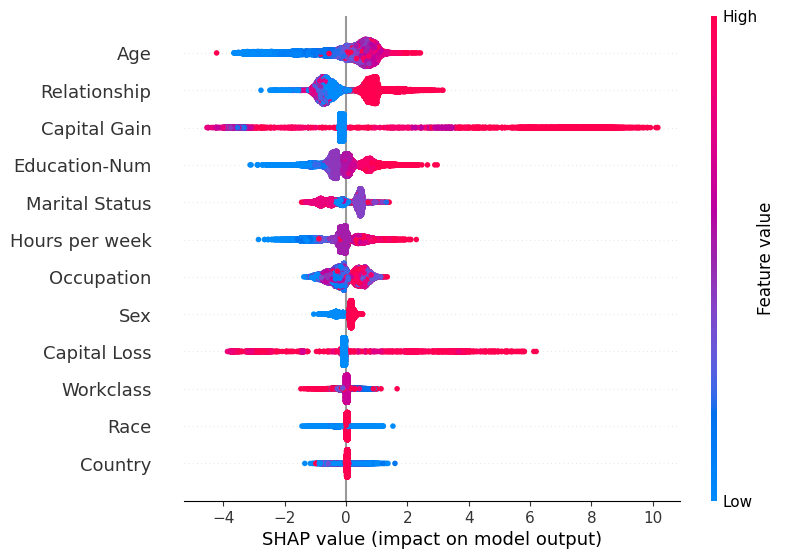

In [ ]:
# 全データに対する特徴量ごとのSHAP値の分布 (色は特徴量の値の高低を表す)
shap.plots.beeswarm(shap_values, max_display=12)